# Q1

In [1]:
#useful modules

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.measure import profile_line
%matplotlib inline
plt.rcParams["figure.figsize"]=7,7

In [2]:
img1 = cv2.cvtColor(cv2.imread('lena_face.jpg'), cv2.COLOR_BGR2GRAY)
print(img1.shape)

(579, 663)


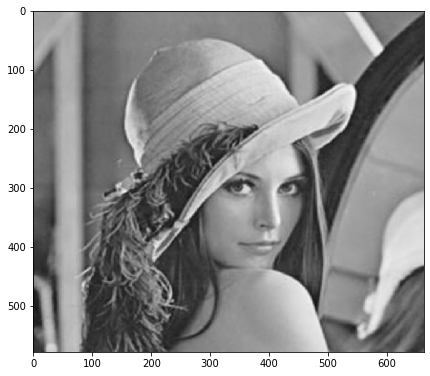

In [3]:
plt.imshow(img1,cmap='gray')
plt.show()

In [4]:
average_mask = np.ones((9,9))/81

In [5]:
average_ans = cv2.filter2D(img1,-1,average_mask)

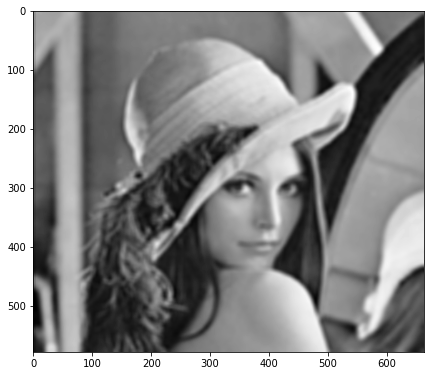

In [6]:
plt.imshow(average_ans,cmap='gray')
plt.show()

In [7]:
weighted_mask = np.array([[ 1,  2,  4,   8,  16,   8,  4,  2,  1],
                          [ 2,  4,  8,  16,  32,  16,  8,  4,  2],
                          [ 4,  8, 16,  32,  64,  32, 16,  8,  4],
                          [ 8, 16, 32,  64, 128,  64, 32, 16,  8],
                          [16, 32, 64, 128, 256, 128, 64, 32, 16],
                          [ 8, 16, 32,  64, 128,  64, 32, 16,  8],
                          [ 4,  8, 16,  32,  64,  32, 16,  8,  4],
                          [ 2,  4,  8,  16,  32,  16,  8,  4,  2],
                          [ 1,  2,  4,   8,  16,   8,  4,  2,  1]])

weighted_mask = weighted_mask/np.sum(weighted_mask)

In [8]:
weighted_ans = cv2.filter2D(img1,-1,weighted_mask)

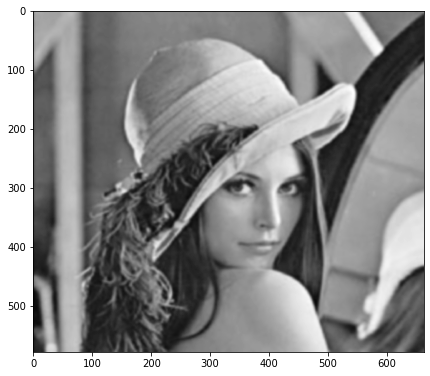

In [9]:
plt.imshow(weighted_ans,cmap='gray')
plt.show()

# Q2

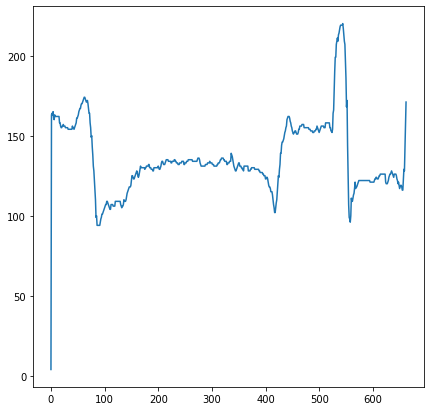

In [3]:
# row no 0 for graph
rn = 0
x1 = np.arange(0,img1.shape[1])
y1 = img1[rn]
plt.plot(x1,y1)
plt.show()

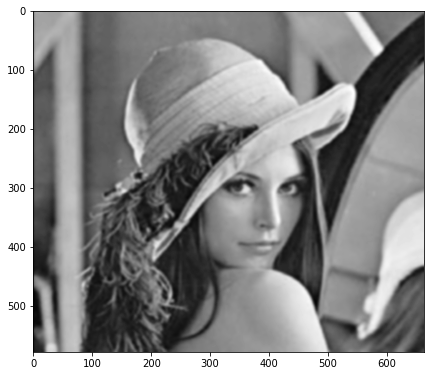

In [4]:
gaussian_blur = cv2.GaussianBlur(img1,(9,9),0)
plt.imshow(gaussian_blur,cmap='gray')
plt.show()

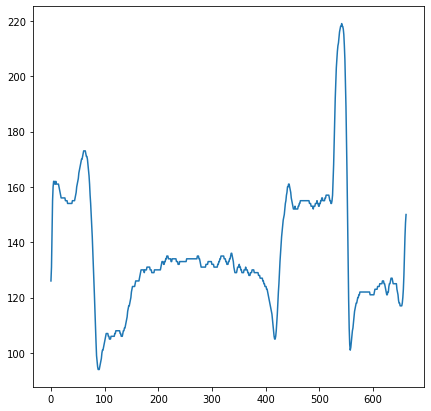

In [5]:
# row no 0 for graph
x2 = np.arange(0,img1.shape[1])
y2 = gaussian_blur[rn]
plt.plot(x2,y2)
plt.show()

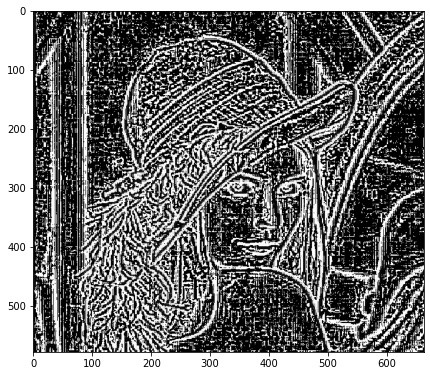

In [20]:
unsharp_mask = img1 - gaussian_blur

# unsharp_mask = unsharp_mask - np.min(unsharp_mask)
# unsharp_mask = np.array(255*(unsharp_mask/np.max(unsharp_mask)),dtype='uint8')

plt.imshow(unsharp_mask,cmap='gray')
cv2.imwrite('unsharp_mask.jpg',unsharp_mask)
plt.show()

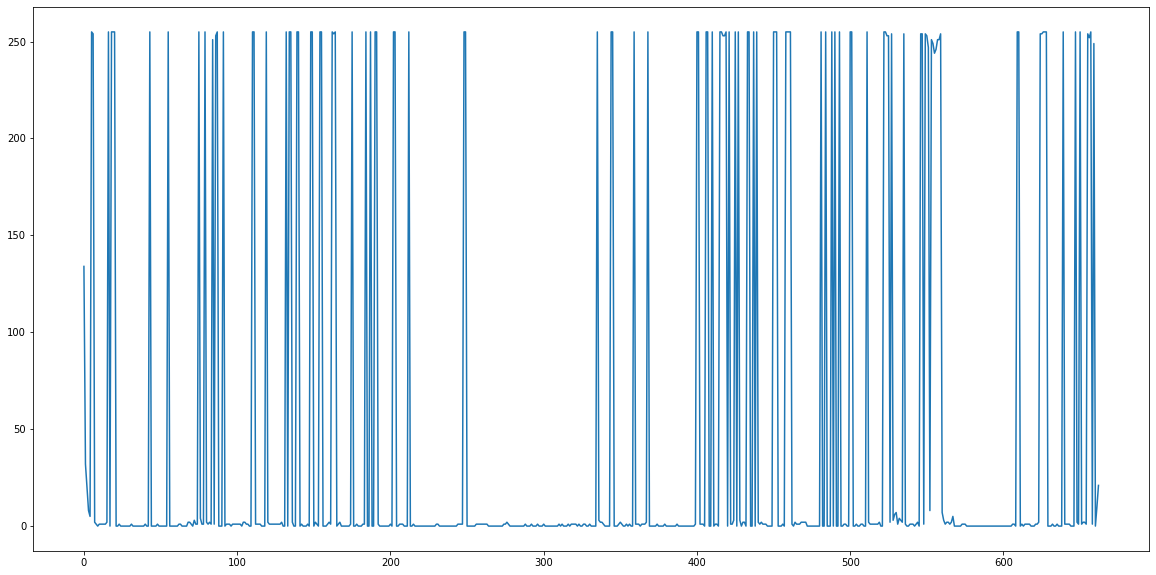

In [21]:
# row no 0 for graph
x2 = np.arange(0,img1.shape[1])
y2 = unsharp_mask[rn]
plt.figure(figsize=(20,10))
plt.plot(x2,y2)
plt.show()

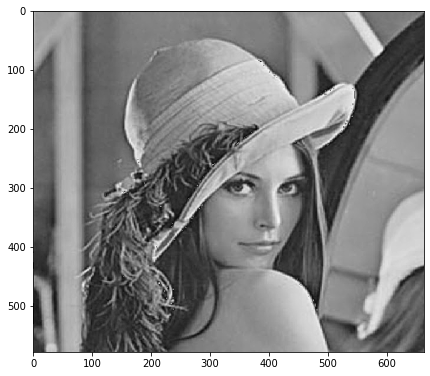

In [22]:
k = 1
sharped_image = img1 + k*unsharp_mask
plt.imshow(sharped_image,cmap='gray')
plt.show()

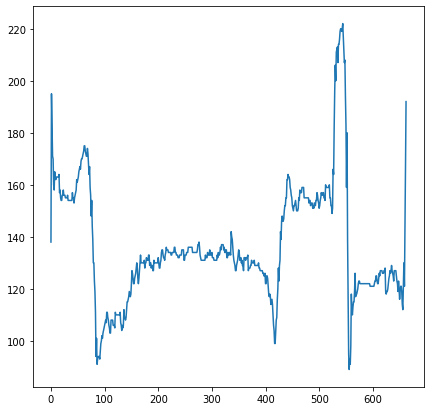

In [23]:
# row no 300 for graph
x3 = np.arange(0,img1.shape[1])
y3 = sharped_image[rn]
plt.plot(x3,y3)
plt.show()

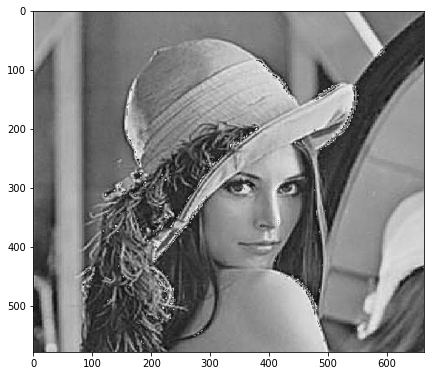

In [24]:
k = 2
sharped_image12 = img1 + k*unsharp_mask
plt.imshow(sharped_image12,cmap='gray')
plt.show()

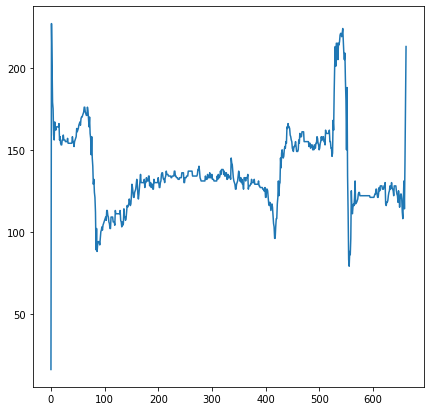

In [25]:
# row no 300 for graph
x4 = np.arange(0,img1.shape[1])
y4 = sharped_image12[rn]
plt.plot(x4,y4)
plt.show()

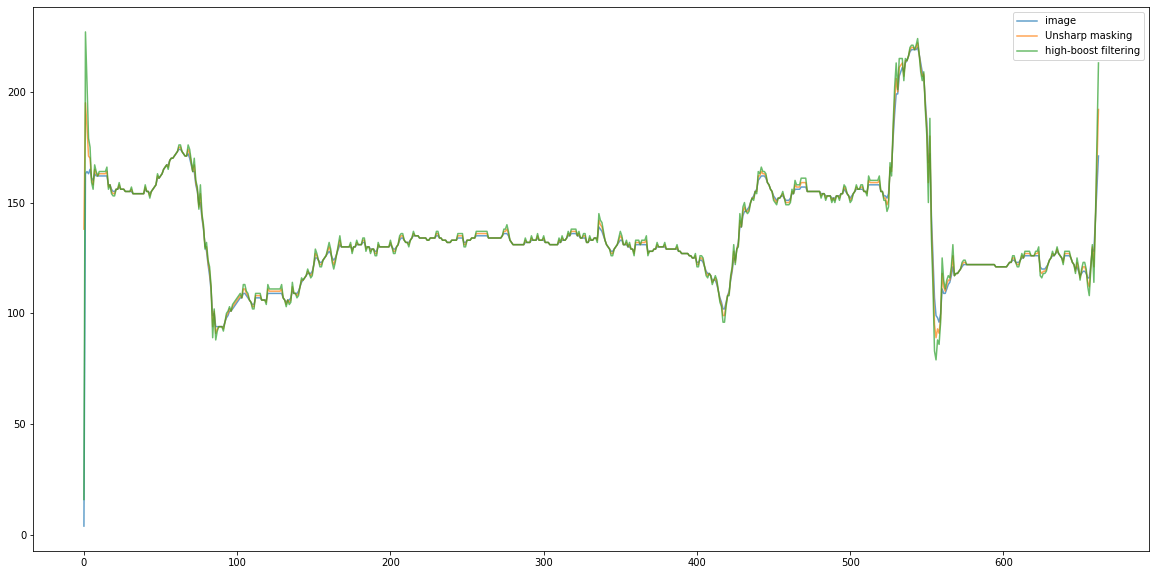

In [20]:
plt.figure(figsize=(20,10))
plt.plot(x1,y1,alpha = 0.7,label='image')
plt.plot(x3,y3,alpha = 0.7,label='Unsharp masking')
plt.plot(x4,y4,alpha = 0.7,label='high-boost filtering')
plt.legend()
plt.show()

# Q3

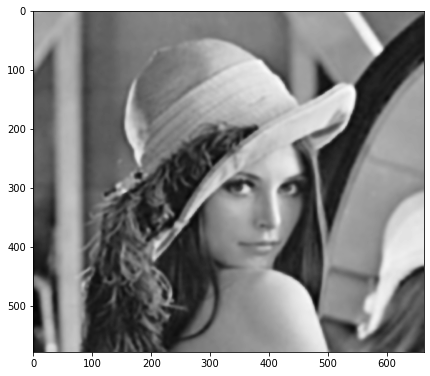

In [21]:
bilateralFilter_blur = cv2.bilateralFilter(img1,9,100,100)
plt.imshow(bilateralFilter_blur,cmap='gray')
plt.show()

# Q4

In [26]:
img2 = cv2.cvtColor(cv2.imread('skeleton.JPG'), cv2.COLOR_BGR2GRAY)
print(img2.shape)

(503, 321)


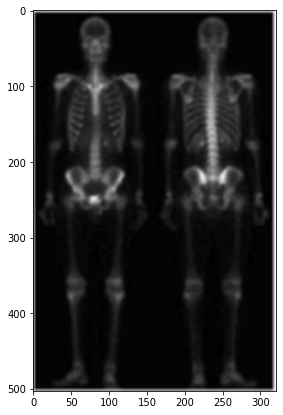

In [27]:
average_mask2 = np.ones((5,5))/81
average_ans2 = cv2.filter2D(img2,-1,average_mask2)
# average_ans2 = cv2.bilateralFilter(img2,9,100,100)
plt.imshow(average_ans2,cmap='gray')
plt.show()

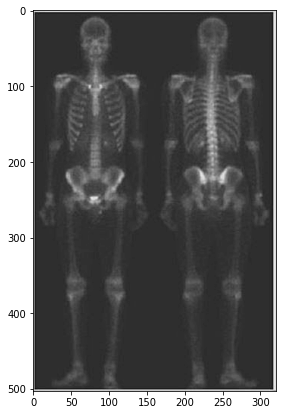

In [28]:
unsharp_mask2 = img2 - 1.0*average_ans2

unsharp_mask2 = unsharp_mask2 - np.min(unsharp_mask2)
unsharp_mask2 = np.array(255*(unsharp_mask2/np.max(unsharp_mask2)),dtype='uint8')

plt.imshow(unsharp_mask2,cmap='gray')
plt.show()

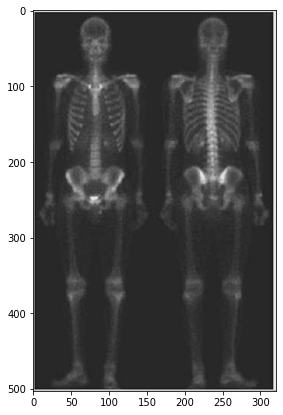

In [29]:
ans = img2 + 3.0*unsharp_mask2

ans = ans - np.min(ans)
ans = np.array(255*(ans/np.max(ans)),dtype='uint8')

plt.imshow(ans,cmap='gray')
plt.show()

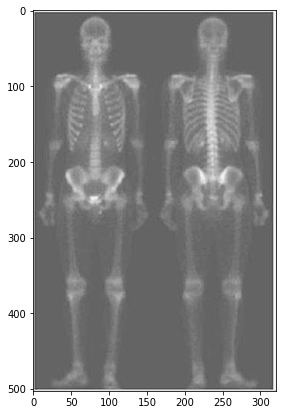

In [30]:
ans = np.array(255*((ans/255))**0.5,dtype='uint8')
plt.imshow(ans,cmap='gray')
plt.show()

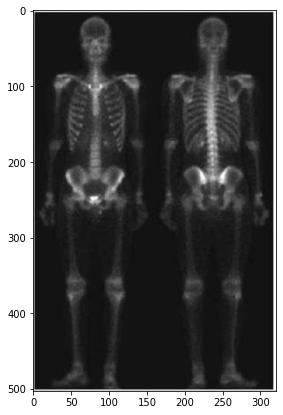

In [31]:
plt.imshow(img2,cmap='gray')
plt.show()

# Q4

In [19]:
img2 = cv2.cvtColor(cv2.imread('skeleton.JPG'), cv2.COLOR_BGR2GRAY)/255
print(img2.shape)

(503, 321)


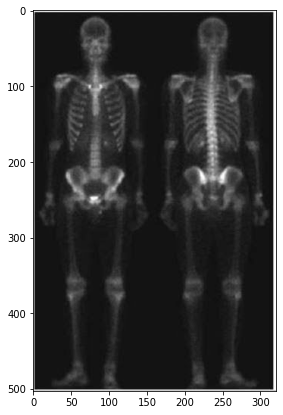

In [20]:
plt.imshow(img2,cmap='gray')
plt.show()

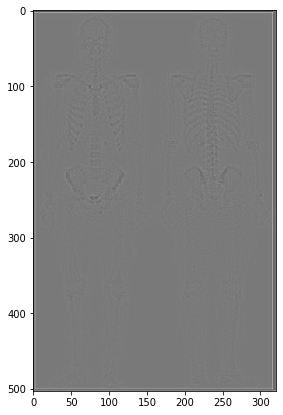

In [29]:
img21 = cv2.Laplacian(img2,-1)

img21 = img21 - np.min(img21)
img21 = img21/np.max(img21)

plt.imshow(img21,cmap='gray')
plt.show()

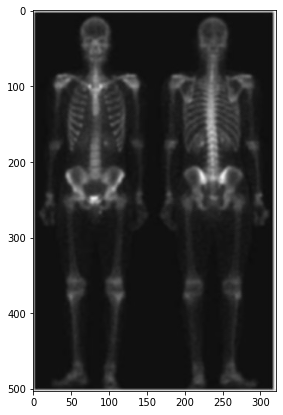

In [33]:
img22 = img2 + img21

img22 = img22 - np.min(img22)
img22 = img22/np.max(img22)

plt.imshow(img22,cmap='gray')
plt.show()

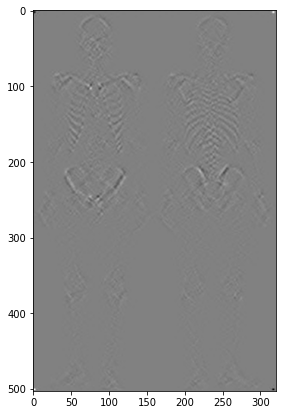

In [34]:
img23 = cv2.Sobel(img2,-1,1,1,ksize=5)

img23 = img23 - np.min(img23)
img23 = img23/np.max(img23)

plt.imshow(img23,cmap='gray')
plt.show()

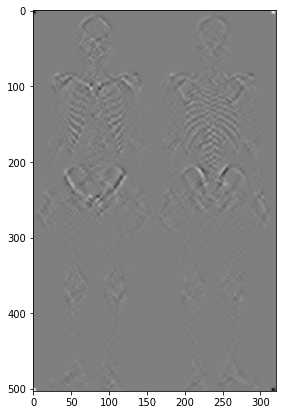

In [35]:
img24 = cv2.GaussianBlur(img23,(5,5),0)

img24 = img24 - np.min(img24)
img24 = img24/np.max(img24)

plt.imshow(img24,cmap='gray')
plt.show()

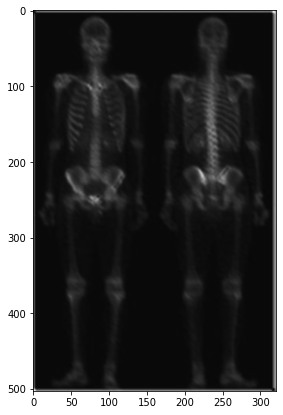

In [36]:
img25 = img22*img24

img25 = img25 - np.min(img25)
img25 = img25/np.max(img25)

plt.imshow(img25,cmap='gray')
plt.show()

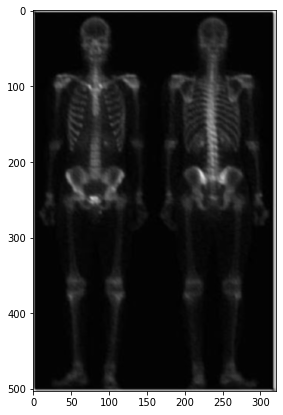

In [37]:
img26 = img2 + img25

img26 = img26 - np.min(img26)
img26 = img26/np.max(img26)

plt.imshow(img26,cmap='gray')
plt.show()

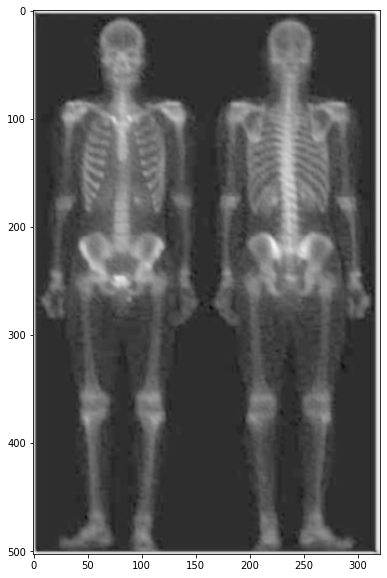

In [104]:
img27 = img26**0.4
img27 = img27 - np.min(img27)
img27 = img27/np.max(img27)
plt.figure(figsize=(20,10))
plt.imshow(img27,cmap='gray')
plt.show()

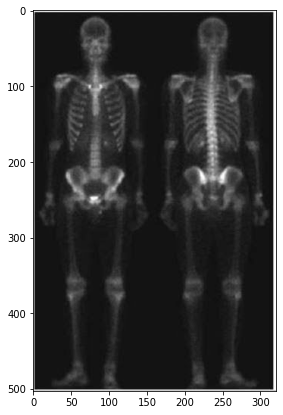

In [46]:
plt.imshow(img2,cmap='gray')
plt.show()